# Proyecto 1, Modelos de Gestión Financiera
## Sebastian Puerto
## 25 de septiembre de 2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from tabulate import tabulate
np.set_printoptions(precision=6) #Mostrar numeros con maximo seis digitos de precision
np.set_printoptions(suppress=True) # Suprimir uso de notacion cientifica para numeros muy pequenos

In [2]:
N = 23 # Numero de periodos
mYah = 0 # Numero de acciones extraidas de Yahoo
mFin = 6 # Numero de acciones extraidas de Finance.com
M = mYah + mFin # Numero de acciones

precios = np.zeros((M, N+1))
retornos = np.zeros((M, N))

Extrayendo columnas de los archivos de Yahoo Finance:

In [3]:
archivosYahoo = ['csvs/EC.csv','csvs/CIB.csv']

In [4]:
for k in range(mYah):
    archivo = archivosYahoo[k]
    lector = csv.reader(open(archivo))
    lector.__next__() #Ignorar primer renglon
    
    for i in range(N+1):
        precios[k, i] = lector.__next__()[5] #Extraer la 5ta columna: precio de cierre ajustado
        if (i > 0):
            retornos[k, i-1] = (precios[k, i] - precios[k, i-1])/precios[k, i-1]

Extrayendo columnas de los archivos de Investing.com

In [5]:
 archivosFin = [ 'csvs/CFV-2.csv', 'csvs/FTSE-2.csv', 'csvs/IMI-2.csv', 
                'csvs/BIC_p1-2.csv', 'csvs/MAS-2.csv', 'csvs/PMG-2.csv']

In [6]:
for k in range(mYah, mYah + mFin):
    archivo = archivosFin[k - mYah]
    lector = csv.reader(open(archivo))
    lector.__next__() #Ignorar primer renglon
    
    for i in range(N, -1, -1):
        precios[k, i] = lector.__next__()[1] #Extraer la 1era columna: precio de cierre
        if (i < N):
            retornos[k, i] = np.log(precios[k, i+1]/precios[k, i])

In [7]:
np.shape(retornos)

(6, 23)

TODO: Explicar, a la luz de la lectura 1, la naturaleza de esos activos.

# 3

Vector de Rendimientos promedio

In [8]:
# Hallar el promedio de la matriz de retornos a lo largo del eje temporal
retProm = np.mean(retornos, 1, keepdims = True) 

# En efecto el vector retProm tiene tamaño 7x1, donde 7 es el número de activos
print("Tamaño de matriz de rentabilidades:", np.shape(retProm)) 
print("Retornos promedio:\n", retProm)

Tamaño de matriz de rentabilidades: (6, 1)
Retornos promedio:
 [[-0.002508]
 [ 0.009664]
 [ 0.003279]
 [ 0.017928]
 [ 0.015429]
 [ 0.000121]]


Matriz de Covarianzas

In [38]:
S = np.zeros((M,M)) # Inicializacion en 0's

for k in range(M): # Iterar con k sobre activos
    for l in range(M): # Iterar con l sobre activos
        for i in range(N): # Iterar sobre el tiempo con i
            # Para la combinacion de activos k y l se suma la contribución a la covarianza por el tiempo i
            S[k, l] += (retornos[k, i] - retProm[k])*(retornos[l, i] - retProm[l])

S = S/N
            
print("Matriz de covarianzas:\n", S)

Matriz de covarianzas:
 [[ 0.007754  0.002942  0.00295   0.002778  0.000691 -0.001517]
 [ 0.002942  0.002283  0.001784  0.002084  0.000394 -0.000283]
 [ 0.00295   0.001784  0.003373  0.001712  0.001087 -0.000476]
 [ 0.002778  0.002084  0.001712  0.002961  0.000337 -0.000736]
 [ 0.000691  0.000394  0.001087  0.000337  0.005454 -0.000407]
 [-0.001517 -0.000283 -0.000476 -0.000736 -0.000407  0.006748]]


In [10]:
varianzas = np.array([S[i, i] for i in range(M)]).reshape((M, 1))
desvs = np.sqrt(varianzas)

print("\nVarianzas:\n", varianzas)


def varPort(x): # Funcion de calculo de varianza de un portafolio x^T S x
    return x.T.dot(S).dot(x)[0,0]

print(varPort(np.array([1,0,0,0,0,0]).reshape(M,1))) # Verificacion de que la funcion varPort funciona
print(varPort(np.array([0,0,0,1,0,0]).reshape(M,1))) # Verificacion de que la funcion varPort funciona


Varianzas:
 [[0.007754]
 [0.002283]
 [0.003373]
 [0.002961]
 [0.005454]
 [0.006748]]
0.007754358993630251
0.0029608184790017064


## Matriz de Covarianzas es Definida Positiva

### Matriz Cuadrada

In [11]:
np.shape(S)

(6, 6)

### Simétrica

In [12]:
S - S.transpose() # Debería ser igual a su transpuesta,  y lo es pues su diferencia es 0

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

### Definida Positiva

Usamos la caracterización vista en clase: los subdeterminantes en línea son positivos. En particular vemos que el determinante de la matriz es distinto de $0$.

In [13]:
for k in range(1,M):
    submatPpal = S[:k, :k]
    detp = np.linalg.det(submatPpal)
    print("El determinante de la submatriz  de tamaño ", np.shape(submatPpal),
          " que contiene la entrada 1,1, es decir la matriz\n", submatPpal, " es ", detp, "!= 0\n")

El determinante de la submatriz  de tamaño  (1, 1)  que contiene la entrada 1,1, es decir la matriz
 [[0.007754]]  es  0.00775435899363025 != 0

El determinante de la submatriz  de tamaño  (2, 2)  que contiene la entrada 1,1, es decir la matriz
 [[0.007754 0.002942]
 [0.002942 0.002283]]  es  9.053360432267001e-06 != 0

El determinante de la submatriz  de tamaño  (3, 3)  que contiene la entrada 1,1, es decir la matriz
 [[0.007754 0.002942 0.00295 ]
 [0.002942 0.002283 0.001784]
 [0.00295  0.001784 0.003373]]  es  1.6946472922528534e-08 != 0

El determinante de la submatriz  de tamaño  (4, 4)  que contiene la entrada 1,1, es decir la matriz
 [[0.007754 0.002942 0.00295  0.002778]
 [0.002942 0.002283 0.001784 0.002084]
 [0.00295  0.001784 0.003373 0.001712]
 [0.002778 0.002084 0.001712 0.002961]]  es  1.7859573143729452e-11 != 0

El determinante de la submatriz  de tamaño  (5, 5)  que contiene la entrada 1,1, es decir la matriz
 [[0.007754 0.002942 0.00295  0.002778 0.000691]
 [0.002942 

In [14]:
Sinv = np.linalg.inv(S)
print(Sinv)

[[ 279.597343 -288.892382  -88.864698    2.875857    6.336394   45.163476]
 [-288.892382 1799.749289 -279.364601 -860.590457    7.83156  -102.60871 ]
 [ -88.864698 -279.364601  567.341127  -39.232496  -79.227327   -0.719537]
 [   2.875857 -860.590457  -39.232496  979.154992   14.262749   69.468071]
 [   6.336394    7.83156   -79.227327   14.262749  197.594754    9.647939]
 [  45.163476 -102.60871    -0.719537   69.468071    9.647939  162.153015]]


In [15]:
S.dot(Sinv)

array([[ 1., -0., -0., -0.,  0., -0.],
       [ 0.,  1., -0., -0., -0.,  0.],
       [-0., -0.,  1., -0., -0., -0.],
       [-0.,  0., -0.,  1.,  0., -0.],
       [ 0., -0., -0.,  0.,  1., -0.],
       [ 0., -0., -0.,  0.,  0.,  1.]])

# 4

Parámetros de la teoría

In [16]:
u = np.ones((M, 1))

A = u.T.dot(Sinv.dot(u))[0,0]
B = u.T.dot(Sinv.dot(retProm))[0,0]
C = retProm.T.dot(Sinv.dot(retProm))[0,0]
D = A*C - B**2

print("A =", A, "\t B =", B, "\t C =", C, ", entonces D =", D)

A = 817.7621961321386 	 B = 8.451396002764882 	 C = 0.23416370931686742 , entonces D = 120.06413478985898


# 5

Ecuación general de los portafolios óptimos dados los parámetros de la teoría $A, B, C$ y el parámetro $\mu$: $x*(\mu) = (\frac{C - B\mu}{D}) S^{-1} \hat u + (\frac{A \mu - B}{D})S^{-1}\bar r$.

La varianza de estos portafolios, dada como función de $\mu$ tiene la fórula $\sigma^2(\mu) = \frac{A\mu^2 - 2B\mu +C}{D}$, la cual llamamos la frontera eficiente.

En nuestro caso, como:

In [17]:
def xOptMu(mu): # Funcion para calculo del portafolio optimo dado parametro mu. Devuelve matrix mx1
    return ((C - B*mu)/D) * Sinv.dot(u) + ((A*mu - B)/D) * Sinv.dot(retProm)


#Test para ver que xOptMu funciona bien: comprobar que en mu = B/A se halla el portafolio optimo
#print(xOptMu(B/A)) # Portafolio calculado
#print(1/A * Sinv.dot(u)) # Portafolio optimo teorico
# print(varPort(xOptMu(B/A)), 1/A) # Varianzas calculadas y teorica

rentDeseadas = np.linspace(0., 0.03, 9)

portOptMu = np.zeros( (M, len(rentDeseadas)) )

for i in range(len(rentDeseadas)):
    portOptMu[:,i] = xOptMu(rentDeseadas[i]).flatten()
    
print("\t\t PORTAFOLIOS EFICIENTES")
print("Cada fila corresponde a un activo y cada columna a un valo de mu distinto\n")
print(tabulate(portOptMu, rentDeseadas))

		 PORTAFOLIOS EFICIENTES
Cada fila corresponde a un activo y cada columna a un valo de mu distinto

       0.0     0.00375      0.0075     0.01125        0.015    0.01875      0.0225     0.02625        0.03
----------  ----------  ----------  ----------  -----------  ---------  ----------  ----------  ----------
 0.170104    0.0889541  0.00780374  -0.0733466  -0.154497    -0.235647  -0.316798   -0.397948   -0.479098
 0.406058    0.381239   0.356421     0.331602    0.306783     0.281964   0.257145    0.232327    0.207508
 0.334869    0.248828   0.162787     0.0767465  -0.00929424  -0.095335  -0.181376   -0.267416   -0.353457
-0.333075   -0.138589   0.0558977    0.250384    0.44487      0.639356   0.833842    1.02833     1.22281
 0.0865137   0.124539   0.162565     0.20059     0.238616     0.276642   0.314667    0.352693    0.390718
 0.33553     0.295028   0.254526     0.214024    0.173522     0.13302    0.0925184   0.0520165   0.0115146


En todos los portafolios hay posiciones en corto para al menos un activo.

Escogeremos los siguientes 4 portafolios eficientes:

In [18]:
musElegidos = [rentDeseadas[2], rentDeseadas[4], rentDeseadas[6], rentDeseadas[8]]
# Matriz cuya entrada i sera el portafolio i de tamaño Mx1
portElegidos = [xOptMu(mu).reshape(M,1) for mu in musElegidos]
varElegidos = [varPort(xOptMu(mu)) for mu in musElegidos]

# 6

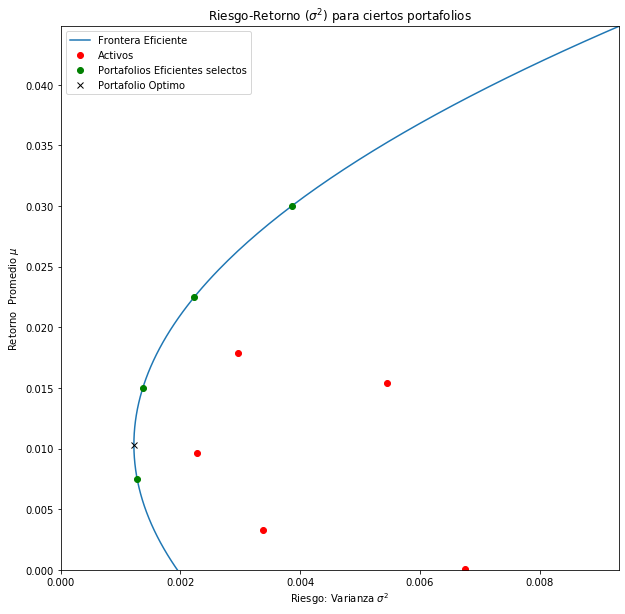

In [19]:
mus = np.linspace(-0.005, 2.5*np.max(retProm), 200)
varFront = (A*mus**2 - 2*mus*B + C)/D

plt.figure(figsize = (10,10))
plt.title("Riesgo-Retorno ($\sigma^2$) para ciertos portafolios")

plt.xlabel("Riesgo: Varianza $\sigma^2$")
plt.ylabel("Retorno  Promedio $\mu$")

plt.xlim(left = 0, right = max(varFront))
plt.ylim(bottom = 0, top = max(mus))

# Frontera eficiente
plt.plot(varFront, mus) 

# Activos elegidos
plt.plot(varianzas, retProm, 'ro') 

# 4 Portafolios Eficientes
plt.plot(varElegidos, musElegidos, 'go')

plt.plot(1/A, B/A, 'kx')

plt.legend(("Frontera Eficiente", "Activos", "Portafolios Eficientes selectos", 
            "Portafolio Optimo"), loc = "upper left")

# 7

### Calculo de la tasa libre de riesgo correspondiente a cada portafolio eficiente, es decir el corte de su linea de mercado con el eje de rentabilidad.

Funciones Ayudantes

La rentabilidad promedio del portafolio $x$ se halla como $\bar r_x = \bar r^T x$.

La línea de mercado de capital correspondiente a un portafolio eficiente es la línea tangente a la frontera eficiente que que pasa por este portafolio. Para calcular su fómrmula basta diferenciar implícitamente la fórmula de la frontera eficiente $\sigma^2(\mu) = \frac{A\mu^2 - 2B\mu +C}{D}$. Primero pasamos la $D$ a multiplicar, así que obtenemos: $D \sigma^2 = A \mu^2 - 2B \mu + C$. Al derivar implícitamente respecto a $\sigma$ (coordenada $x$) obtenemos $2D \sigma = 2A \mu \mu' - 2B \mu'$. De aquí se deduce que la pendiente de la línea de mercado de capital tiene pendiente $\mu' = \frac{2D \sigma^*}{2A\mu^* - 2B}$ (dados $\sigma^*, \mu^*$ de la frontera eficiente). Esto significa que la linea de mercado de capital tenga una ecuación de la forma $\mu = \tau + \mu'_{\sigma*,\mu*} \sigma$; como $(\sigma^*, \mu^*)$ pertenece a esta recta, se deduce que el punto de corte $\tau$ es $\tau = \frac{2A(\mu^*) ^2 - 2B\mu^* - 2\sigma^2 D}{2A\mu^* - 2B}$. En el punto $10$ usamos la formula hallada del problema de optimización de pendiente y comprobamos que estas $2$ formulas coinciden, al menos para los portafolios escogidos.

In [20]:
def muPort(port): # Funcion que calcula la rentabilidad promedio de un portafolio
    return port.T.dot(retProm)[0,0]

# Funcion que calcula el punto de corte de la linea de mercado de capital con el portafolio eficiente
# de rentabilidad mu
def corteMu(mu): 
    var = varPort(xOptMu(mu))
    return (2*A*mu**2 - 2*B*mu - 2*var*D)/(2*A*mu - 2*B)

# Verificacion de que la funcion que calucula el rendimiento de un portafolio funciona
#print(muPort(np.array([1, 0, 0, 0, 0, 0]).reshape(m, 1))) #0.0014838
#print(muPort(np.array([0, 0, 0, 0, 1, 0]).reshape(m, 1))) #0.018384

# Verificacion de que tauMu es calculado correctamente
#print(tauMu(muPort(portOptMu[:,8].reshape(m, 1))), corteMu(muPort(portOptMu[:,8].reshape(m, 1))))
#print(tauMu(100))
#print(B/A)

Cálculo de los $\tau$s correspondientes a los valores de $\mu$ escogidos:

In [21]:
tausCalculados = [corteMu(mu) for mu in musElegidos]
print("mu's: \t", musElegidos)
print("tau's: \t", tausCalculados)

mu's: 	 [0.0075, 0.015, 0.0225, 0.03]
tau's: 	 [0.07366911706163386, -0.028149863549533544, -0.004423620653802416, 0.0012049999725916873]


Calculo de la frontera eficiente para una región buena

In [22]:
muMax = 2.5*np.max(retProm) # Mu maximo para el cual se calcula la frontera eficiente
sigMax =  np.sqrt((A*muMax**2 - 2*muMax*B + C)/D) #Limite derecho del eje sigma

mus = np.linspace(-0.0025, muMax, 200)
stdFront = np.sqrt((A*mus**2 - 2*mus*B + C)/D)

### PRIMER PORTAFOLIO EFICIENTE

El portafolio eficiente para el cual se está graficando su línea de mercado y   tasa libre de riesgo es:
 [[0.007804]
 [0.356421]
 [0.162787]
 [0.055898]
 [0.162565]
 [0.254526]]
El cual tiene un rendimiento promedio de:  0.0075 una varianza de 0.0012775829607759184 y le corresonde una tasa libre de riesgo de 0.07366911706163386


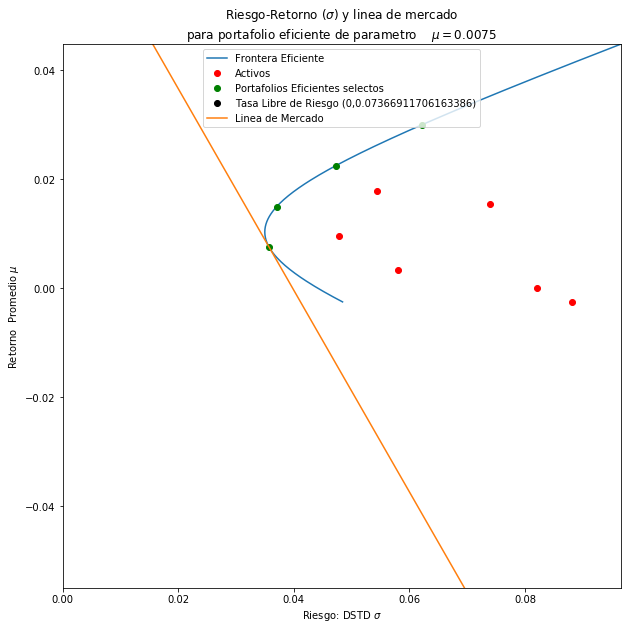

In [23]:
    # PRIMER PORTAFOLIO 

#Indice para el portafolio actual 
# UNICO PARAMETRO QUE SE CAMBIA PARA LAS GRAFICAS SIGUIENTES
i = 0 

######################################################
mu = musElegidos[i]
port = portElegidos[i]
var = varPort(port)
std = np.sqrt(var)
tau = corteMu(mu)

# Pendiente de la linea de mercado de capital
m = (mu - tau)/(std-0)

    
print("El portafolio eficiente para el cual se está graficando su línea de mercado y \
      tasa libre de riesgo es:\n", 
      xOptMu(musElegidos[i]))
print("El cual tiene un rendimiento promedio de: ", mu, 
      "una varianza de", var,
      "y le corresonde una tasa libre de riesgo de", tau)


plt.figure(figsize = (10,10))
plt.title("Riesgo-Retorno ($\sigma$) y linea de mercado \npara portafolio eficiente de parametro\
        $\mu=$" + str(mu))

plt.xlabel("Riesgo: DSTD $\sigma$")
plt.ylabel("Retorno  Promedio $\mu$")

plt.xlim(left = 0, right = sigMax)
plt.ylim(bottom = -0.055, top = muMax)

# Frontera eficiente
plt.plot(stdFront, mus)

# Activos elegidos
plt.plot(np.sqrt(varianzas), retProm, 'ro') 

# 4 Portafolios Eficientes
plt.plot(np.sqrt(varElegidos), musElegidos, 'go')

# LINEA DE MERCADO Y CORTE CON EL EJE DE RENDIMIENTOS: TASA LIBRE DE RIESGO
plt.plot([0], [tau], 'ko')
xs = np.linspace(0, sigMax, 100)
ys = m*xs + tau
plt.plot(xs, ys)

plt.legend(("Frontera Eficiente", "Activos", "Portafolios Eficientes selectos", 
            "Tasa Libre de Riesgo (0," + str(tau)+")", "Linea de Mercado"), loc = "upper center")

El portafolio optimo que se halla con este valor de $\mu$ no es deseable, pues hay portafolios con mayores rendimientos y menores riesgos disponibles. Por lo tanto, la línea de mercado hallada no es útil.

### SEGUNDO PORTAFOLIO

El portafolio eficiente para el cual se está graficando su línea de mercado ytasa libre de riesgo es:
 [[-0.154497]
 [ 0.306783]
 [-0.009294]
 [ 0.44487 ]
 [ 0.238616]
 [ 0.173522]]
El cual tiene un rendimiento promedio de:  0.015 una varianza de 0.0013710865751189864 y le corresonde una tasa libre de riesgo de -0.028149863549533544


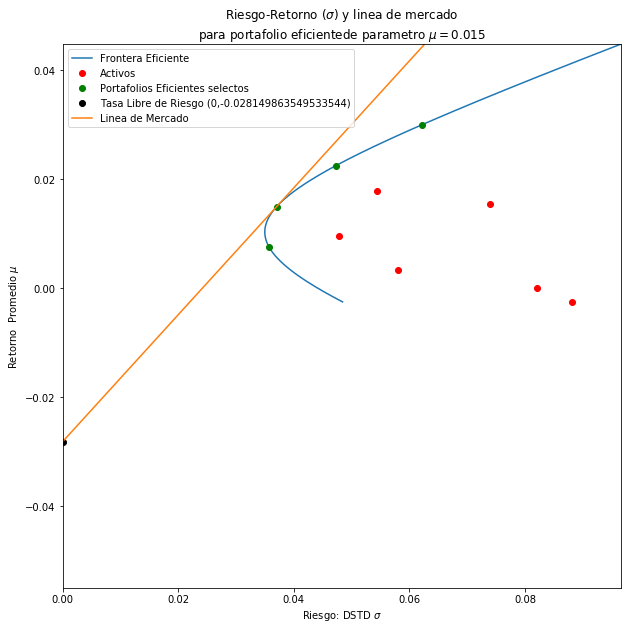

In [24]:
    # SEGUNDO PORTAFOLIO 

#Indice para el portafolio actual 
# UNICO PARAMETRO QUE SE CAMBIA PARA LAS GRAFICAS SIGUIENTES
i = 1

######################################################
mu = musElegidos[i]
port = portElegidos[i]
var = varPort(port)
std = np.sqrt(var)
tau = corteMu(mu)

# Pendiente de la linea de mercado de capital
m = (mu - tau)/(std-0)

    
print("El portafolio eficiente para el cual se está graficando su línea de mercado y\
tasa libre de riesgo es:\n", 
      xOptMu(musElegidos[i]))
print("El cual tiene un rendimiento promedio de: ", mu, 
      "una varianza de", var,
      "y le corresonde una tasa libre de riesgo de", tau)


plt.figure(figsize = (10,10))
plt.title("Riesgo-Retorno ($\sigma$) y linea de mercado \npara portafolio eficiente\
de parametro $\mu=$" + str(mu))

plt.xlabel("Riesgo: DSTD $\sigma$")
plt.ylabel("Retorno  Promedio $\mu$")

plt.xlim(left = 0, right = sigMax)
plt.ylim(bottom = -0.055, top = muMax)

# Frontera eficiente
plt.plot(stdFront, mus)

# Activos elegidos
plt.plot(np.sqrt(varianzas), retProm, 'ro') 

# 4 Portafolios Eficientes
plt.plot(np.sqrt(varElegidos), musElegidos, 'go')

# LINEA DE MERCADO Y CORTE CON EL EJE DE RENDIMIENTOS: TASA LIBRE DE RIESGO
plt.plot([0], [tau], 'ko')
xs = np.linspace(0, sigMax, 100)
ys = m*xs + tau
plt.plot(xs, ys)

plt.legend(("Frontera Eficiente", "Activos", "Portafolios Eficientes selectos", 
            "Tasa Libre de Riesgo (0," + str(tau)+")", "Linea de Mercado"), loc = "upper left")

### TERCER PORTAFOLIO

El portafolio eficiente para el cual se está graficando su línea de mercado ytasa libre de riesgo es:
 [[-0.316798]
 [ 0.257145]
 [-0.181376]
 [ 0.833842]
 [ 0.314667]
 [ 0.092518]]
El cual tiene un rendimiento promedio de:  0.0225 una varianza de 0.0022308327249693023 y le corresonde una tasa libre de riesgo de -0.004423620653802416


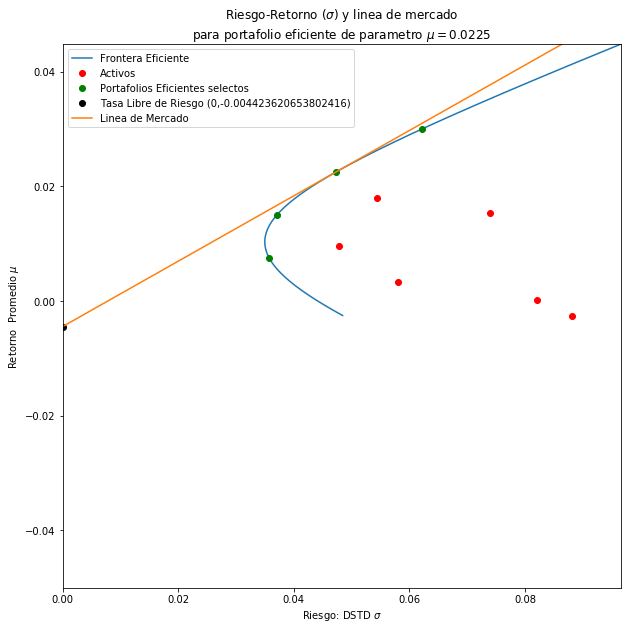

In [25]:
    # TERCER PORTAFOLIO 

#Indice para el portafolio actual 
# UNICO PARAMETRO QUE SE CAMBIA PARA LAS GRAFICAS SIGUIENTES
i = 2

######################################################
mu = musElegidos[i]
port = portElegidos[i]
var = varPort(port)
std = np.sqrt(var)
tau = corteMu(mu)

# Pendiente de la linea de mercado de capital
m = (mu - tau)/(std-0)

    
print("El portafolio eficiente para el cual se está graficando su línea de mercado y\
tasa libre de riesgo es:\n", 
      xOptMu(musElegidos[i]))
print("El cual tiene un rendimiento promedio de: ", mu, 
      "una varianza de", var,
      "y le corresonde una tasa libre de riesgo de", tau)


plt.figure(figsize = (10,10))
plt.title("Riesgo-Retorno ($\sigma$) y linea de mercado \npara portafolio eficiente \
de parametro $\mu=$" + str(mu))

plt.xlabel("Riesgo: DSTD $\sigma$")
plt.ylabel("Retorno  Promedio $\mu$")

plt.xlim(left = 0, right = sigMax)
plt.ylim(bottom = -0.05, top = muMax)

# Frontera eficiente
plt.plot(stdFront, mus)

# Activos elegidos
plt.plot(np.sqrt(varianzas), retProm, 'ro') 

# 4 Portafolios Eficientes
plt.plot(np.sqrt(varElegidos), musElegidos, 'go')

# LINEA DE MERCADO Y CORTE CON EL EJE DE RENDIMIENTOS: TASA LIBRE DE RIESGO
plt.plot([0], [tau], 'ko')
xs = np.linspace(0, sigMax, 100)
ys = m*xs + tau
plt.plot(xs, ys)

plt.legend(("Frontera Eficiente", "Activos", "Portafolios Eficientes selectos", 
            "Tasa Libre de Riesgo (0," + str(tau)+")", "Linea de Mercado"), loc = "upper left")

### CUARTO PORTAFOLIO

El portafolio eficiente para el cual se está graficando su línea de mercado ytasa libre de riesgo es:
 [[-0.479098]
 [ 0.207508]
 [-0.353457]
 [ 1.222815]
 [ 0.390718]
 [ 0.011515]]
El cual tiene un rendimiento promedio de:  0.03 una varianza de 0.003856821410326868 y le corresonde una tasa libre de riesgo de 0.0012049999725916873


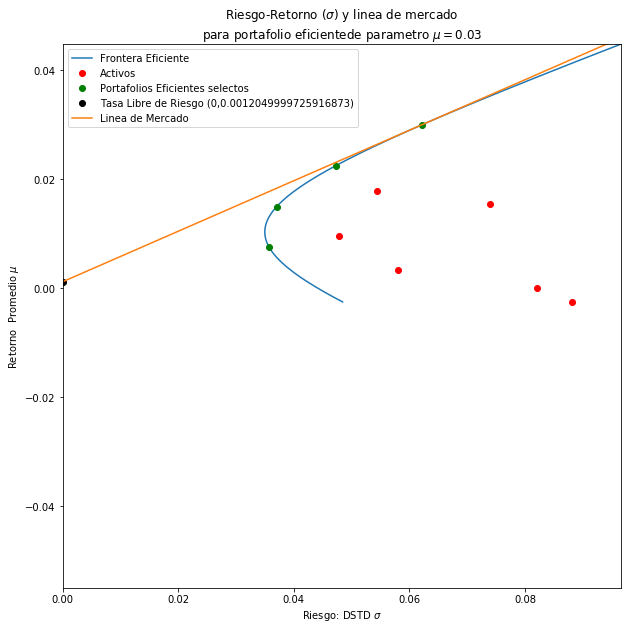

In [26]:
    # CUARTO PORTAFOLIO 

#Indice para el portafolio actual 
# UNICO PARAMETRO QUE SE CAMBIA PARA LAS GRAFICAS SIGUIENTES
i = 3

######################################################
mu = musElegidos[i]
port = portElegidos[i]
var = varPort(port)
std = np.sqrt(var)
tau = corteMu(mu)

# Pendiente de la linea de mercado de capital
m = (mu - tau)/(std-0)

    
print("El portafolio eficiente para el cual se está graficando su línea de mercado y\
tasa libre de riesgo es:\n", 
      xOptMu(musElegidos[i]))
print("El cual tiene un rendimiento promedio de: ", mu, 
      "una varianza de", var,
      "y le corresonde una tasa libre de riesgo de", tau)


plt.figure(figsize = (10,10))
plt.title("Riesgo-Retorno ($\sigma$) y linea de mercado \npara portafolio eficiente\
de parametro $\mu=$" + str(mu))

plt.xlabel("Riesgo: DSTD $\sigma$")
plt.ylabel("Retorno  Promedio $\mu$")

plt.xlim(left = 0, right = sigMax)
plt.ylim(bottom = -0.055, top = muMax)

# Frontera eficiente
plt.plot(stdFront, mus)

# Activos elegidos
plt.plot(np.sqrt(varianzas), retProm, 'ro') 

# 4 Portafolios Eficientes
plt.plot(np.sqrt(varElegidos), musElegidos, 'go')

# LINEA DE MERCADO Y CORTE CON EL EJE DE RENDIMIENTOS: TASA LIBRE DE RIESGO
plt.plot([0], [tau], 'ko')
xs = np.linspace(0, sigMax, 100)
ys = m*xs + tau
plt.plot(xs, ys)

plt.legend(("Frontera Eficiente", "Activos", "Portafolios Eficientes selectos", 
            "Tasa Libre de Riesgo (0," + str(tau)+")", "Linea de Mercado"), loc = "upper left")

# 8

Si la ecuación de la asíntota es $\sigma = m'\mu + b'$, hallando el $lim_{\mu \to \infty} \frac{\sigma_{x*}(\mu)}{m\mu' + b'}$ concluimos que $m' = \sqrt{A/D}$. En ese caso $b' = lim_{\mu \to \infty} \left( \sigma_{x*}(\mu) - \sqrt{A/D}\mu \right) = -\frac{B}{\sqrt{AD}}$.

Despejando $\mu$ como funcion de $\sigma$, la recta queda reescrita como $\mu = \sqrt{\frac D A} \sigma + \frac{B}{A}$, es decir que tiene pendiente $m = \sqrt{\frac D A}$ e intercepto $\tau^* = \frac{B}{A}$

In [27]:
muMax = 4*np.max(retProm) # Mu maximo para el cual se calcula la frontera eficiente
sigMax =  np.sqrt((A*muMax**2 - 2*muMax*B + C)/D) #Limite derecho del eje sigma

mus = np.linspace(-0.0025, muMax, 200)
stdFront = np.sqrt((A*mus**2 - 2*mus*B + C)/D)

In [28]:
m = np.sqrt(D/A)
tauOpt = B/A

print("El corte de la asintota con el eje de rendimientos, tau* =", tauOpt, 
      "se interpreta como la tasa libre de riesga máxima que es compatible con algún portafolio eficiente \
      encontrado. La asintota, entonces, representa un límite a las posibles combinaciones de rendimientos \
      y riesgos que son razonables en combinacion con 'el portafolio eficiente' de rendimiento y riesgo infinito.")

El corte de la asintota con el eje de rendimientos, tau* = 0.01033478441867134 se interpreta como la tasa libre de riesga máxima que es compatible con algún portafolio eficiente       encontrado. La asintota, entonces, representa un límite a las posibles combinaciones de rendimientos       y riesgos que son razonables en combinacion con 'el portafolio eficiente' de rendimiento y riesgo infinito.


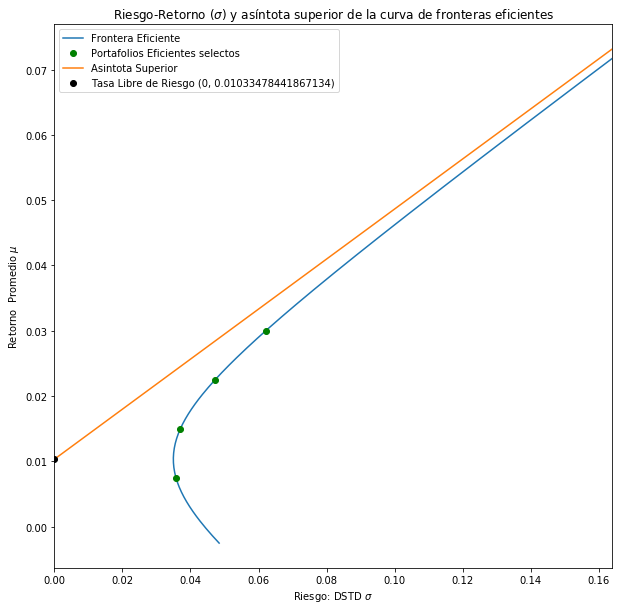

In [29]:
plt.figure(figsize = (10,10))
plt.title("Riesgo-Retorno ($\sigma$) y asíntota superior de la curva de fronteras eficientes")

plt.xlabel("Riesgo: DSTD $\sigma$")
plt.ylabel("Retorno  Promedio $\mu$")

plt.xlim(left = 0, right = sigMax)
#plt.ylim(bottom = -0.055, top = muMax)

# Frontera eficiente
plt.plot(stdFront, mus)

# 4 Portafolios Eficientes
plt.plot(np.sqrt(varElegidos), musElegidos, 'go')


# ASINTOTA SUPERIOR
xs = np.linspace(0, sigMax, 100)
ys = m*xs + tauOpt
plt.plot(xs, ys)

plt.plot([0], [tauOpt], 'ko')

# 

plt.legend(("Frontera Eficiente", "Portafolios Eficientes selectos", 
            "Asintota Superior", "Tasa Libre de Riesgo (0, " + str(tauOpt)+")"), loc = "upper left")

# 9

La frontera eficiente esta descrita por la fórmula $\sigma^2(\mu) = \frac{A\mu^2 - 2B\mu +C}{D}$, la cual, al ser derivada e igualada a $0$ respecto a $\mu$ nos dice que el valor mínimo de riesgo (ya sea varianza o desviacion estándar) se encuentra cuando $\mu^{**} = \frac{B}{A} = \tau^*$, para el cual la varianza del portafolio correspondiente será $\sigma^2_{**} = \frac{1}{A}$ y el portafolio estará dado, entonces, por $x^{**} = \frac{1}{A} S^{-1}\hat u$. En nuestro caso:

In [30]:
muOpt = B/A
varOpt = 1/A
sigOpt = np.sqrt(varOpt)
portOpt = xOptMu(muOpt)

print("Rentabilidad Óptima:\t", muOpt)
print("Varianza Óptima:\t", varOpt)
print("Desviación estandar Óptima:\t", sigOpt)
print("Portafolio Óptimo:\n", portOpt)


Rentabilidad Óptima:	 0.01033478441867134
Varianza Óptima:	 0.0012228493866918916
Desviación estandar Óptima:	 0.034969263456525526
Portafolio Óptimo:
 [[-0.053541]
 [ 0.337659]
 [ 0.097745]
 [ 0.202918]
 [ 0.19131 ]
 [ 0.223909]]


# 10

## Usando las fórmulas que definen a los valores

Para hallar el rendimiento promedio el portafolio $x$ usamos $\bar{r}_x = \bar r^T \cdot x$ (función muPort).

Para hallar su varianza usamos $\sigma_x = x^T S x$ (función varPort). 

La tasa libre de riesgo la hallamos como el punto de corte la línea de mercado de capital, es decir aquella línea tangente a la frontera eficiente que pasa por el portafolio, la cual vimos que tenía fórmula $\tau = \frac{2A(\mu^*) ^2 - 2B\mu^* - 2\sigma^2 D}{2A\mu^* - 2B}$ (función corteMu).

In [31]:
datos = []

for i in range(len(musElegidos)):
    mu = muPort(portElegidos[i])
    var = varPort(portElegidos[i])
    std = np.sqrt(var)
    tau = corteMu(mu)
    datos.append([mu, var, std, tau])

print("TABLA CALCULADA CON FÓRMULAS DE DEFINICIÓN PARA LOS 4 PORTAFOLIOS EFICIENTES ELEGIDOS\n")
print(tabulate(datos, ["Rentabilidad Promedio", "Varianza", "Desv. Std.", "Tasa L.R compatible"]))

TABLA CALCULADA CON FÓRMULAS DE DEFINICIÓN PARA LOS 4 PORTAFOLIOS EFICIENTES ELEGIDOS

  Rentabilidad Promedio    Varianza    Desv. Std.    Tasa L.R compatible
-----------------------  ----------  ------------  ---------------------
                 0.0075  0.00127758     0.0357433             0.0736691
                 0.015   0.00137109     0.0370282            -0.0281499
                 0.0225  0.00223083     0.0472317            -0.00442362
                 0.03    0.00385682     0.0621033             0.001205


## Usando las fórmulas halladas al optimizar respecto a $\mu$

Al resolver el problema de optimización de varianza de los portafolios dada la rentabilidad promedio $\mu$, se deduce que su varianza está dada por la fórmula $\sigma^2(\mu) = \frac{A\mu^2 - 2B\mu +C}{D}$ (funcion varMu).

Utilizamos la misma formula de $\tau$ que en la tabla anterior.

In [32]:
def varMu(mu):
    return (A*mu**2 - 2*B*mu + C)/(D)

datos = []

for i in range(len(musElegidos)):
    mu = musElegidos[i]
    var = varMu(mu)
    std = np.sqrt(var)
    tau = corteMu(mu)
    datos.append([mu, var, std, tau])
    
print("TABLA CALCULADA CON FÓRMULAS DEL PRIMER PROBLEMA DE OPTIMIZACION PARA LOS 4\
PORTAFOLIOS EFICIENTES ELEGIDOS\n")
print(tabulate(datos, ["Rentabilidad Promedio", "Varianza", "Desv. Std.", "Tasa L.R compatible"]))

TABLA CALCULADA CON FÓRMULAS DEL PRIMER PROBLEMA DE OPTIMIZACION PARA LOS 4PORTAFOLIOS EFICIENTES ELEGIDOS

  Rentabilidad Promedio    Varianza    Desv. Std.    Tasa L.R compatible
-----------------------  ----------  ------------  ---------------------
                 0.0075  0.00127758     0.0357433             0.0736691
                 0.015   0.00137109     0.0370282            -0.0281499
                 0.0225  0.00223083     0.0472317            -0.00442362
                 0.03    0.00385682     0.0621033             0.001205


## Usando las fórmulas que se deducen al resolver el problema de optimización respecto a $\tau$

Ahora usamos las fórmulas halladas de la solución al problema de optimización convexo de la funcion $Max \frac{\bar r_x - \tau}{\sigma_x}$ para un parámetro $\tau$ bajo la condición $x\cdot \hat u = 1$.

La rentabilidad promedio viene dada por la fórmula $\mu(\tau) = \frac{C - \tau B}{B - \tau A}$ (funcion muTau).

La varianza del portafolio eficiente hallado viene dado por la fórmula $\sigma^2(\tau) = \frac{ \mu(\tau) - \tau}{B - \tau A}$ (funcion varTau).

In [33]:
datos = []

def tauMu(mu):
    return (mu*B - C)/(mu*A - B)

def muTau(tau):
    return (C - tau*B)/(B - tau*A)

def varTau(tau):
    return (muTau(mu) - tau)/(B - tau * A)

for i in range(len(musElegidos)):
    mu = muTau(tausCalculados[i]) # Taus calculados son los valores calculados como punto de corte de las lineas
    var = varMu(mu)
    std = np.sqrt(var)
    tau = tauMu(mu)
    datos.append([mu, var, std, tau])

print("TABLA CALCULADA CON FÓRMULAS DE DEFINICIÓN PARA LOS 4 PORTAFOLIOS EFICIENTES ELEGIDOS\n")
print(tabulate(datos, ["Rentabilidad Promedio", "Varianza", "Desv. Std.", "Tasa L.R compatible"]))

TABLA CALCULADA CON FÓRMULAS DE DEFINICIÓN PARA LOS 4 PORTAFOLIOS EFICIENTES ELEGIDOS

  Rentabilidad Promedio    Varianza    Desv. Std.    Tasa L.R compatible
-----------------------  ----------  ------------  ---------------------
                 0.0075  0.00127758     0.0357433             0.0736691
                 0.015   0.00137109     0.0370282            -0.0281499
                 0.0225  0.00223083     0.0472317            -0.00442362
                 0.03    0.00385682     0.0621033             0.001205


Al comparar las 3 tablas, vemos que son en efecto todos los valores coinciden, a pesar de haberse usado fórmulas distintas.

# 11

Esogemos el portafolio con $\mu = 0.03$, para el cual $\tau = 0.00328027$ y $\sigma^2 = 0.0038338$

In [34]:
portPM = portElegidos[3]

Podemos o no usar el hecho de que $cov(r_x, r_y) = x^T S y$ para definir la función covarianza.

Funciones ayudantes:

In [35]:
def covarianza(portX, portY):
    #cov = 0
    # Calculo de la rentabilidad promedio de los portafolios
    #muX = muPort(portX)
    #print(muX)
    #muY = muPort(portY)
    #print(muY)
   # 
    #for k in range(M):
    #    cov += (portX[k]  - muX)*(portY[k] - muY)
    #    
    #return cov[0]/M
    return portX.T.dot(S).dot(portY)

# Test para comprobar que la funcion de covarianza funciona
#print(covarianza(portElegidos[1], portElegidos[1]))

def beta1(portX, portPM):
    return  (covarianza(portX, portPM)/covarianza(portPM, portPM))[0,0]

def beta2(portX, portPM):
    muX = muPort(portX)
    muPM = muPort(portPM)
    tau = tauMu(muPM)
    return  (muX - tau)/(muPM - tau)

Representamos los activos como portafolios:

In [36]:
# Matriz cuya entrada k sera el portafolio correspondiente al activo k
portActivos = np.zeros((M, M, 1))

for k in range(M):
    # El activo k se representa como el portafolio que tiene un 1 en la entrada k
    portActivos[k, k] = 1 

#print(portActivos[0])
#print(portPM)

Tabulamos el resultado de las 2 formulas para beta:

In [37]:
datos = []

betas1 = []
betas2 = []
for k in range(M):
    betas1.append(beta1(portActivos[k], portPM))
    betas2.append(beta2(portActivos[k], portPM))

# Para tabular
datos.append(betas1)
datos.append(betas2)

print("BETAS DE CADA ACTIVO RESPECTO A PORTAFOLIO PM ESCOGIDO, SEGUN LAS 2 FORMULA")
print(tabulate(datos,["Activo "+ str(k) for k in range(1, M+1)]))

BETAS DE CADA ACTIVO RESPECTO A PORTAFOLIO PM ESCOGIDO, SEGUN LAS 2 FORMULA
  Activo 1    Activo 2    Activo 3    Activo 4    Activo 5    Activo 6
----------  ----------  ----------  ----------  ----------  ----------
  -0.12893    0.293783   0.0720287    0.580751    0.493984  -0.0376475
  -0.12893    0.293783   0.0720287    0.580751    0.493984  -0.0376475


Como los 2 renglones son iguales, concluimos que las 2 formulas son equivalentes.

# Referencias

- https://finance.yahoo.com/quote/CIB/history?period1=1505883600&period2=1568955600&interval=1mo&filter=history&frequency=1mo
- https://finance.yahoo.com/quote/AVH/history?period1=1505883600&period2=1568955600&interval=1mo&filter=history&frequency=1mo
- https://finance.yahoo.com/quote/CIB/history?p=CIB&.tsrc=fin-srch
- https://es.investing.com/equities/exito-historical-data
- https://es.investing.com/equities/grupoargos-historical-data
- https://es.investing.com/indices/ftse-colombia-historical-data  
- https://es.investing.com/equities/carton-de-colombia-sa-historical-data
- https://www.investing.com/equities/mineros-sa-historical-data